<a href="https://colab.research.google.com/github/RodrigoBonfim/R.F.M/blob/main/Desafio05_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chardet

In [ ]:
!pip install pandas-profiling==3.3.0

In [ ]:
import pandas as pd
import chardet
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [ ]:
with open('/content/data.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

df = pd.read_csv('/content/data.csv', encoding=encoding)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
ProfileReport(df)

In [ ]:
#Verificando valores nulos
df.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Valores nulos removidos
df = df.dropna()
df.isna().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Verificando se há valores nulos ou menores ou iguais a zero na coluna Preço
print(df['UnitPrice'].isnull().any())
print((df['UnitPrice'] <= 0).any())

False
True


In [ ]:
#Filtrando a coluna Preço
df = df[df.UnitPrice>0]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
print((df['UnitPrice'] <= 0).any())

False


In [ ]:
#Verificando se há valores nulos ou menores ou iguais a zero na coluna quantidade
print(df['Quantity'].isnull().any())
print((df['Quantity'] <= 0).any())

False
True


In [ ]:
#Filtrando a coluna quantidade
df = df[df.Quantity>0]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
print((df['Quantity'] <= 0).any())

False


In [ ]:
#Verificando se há colunas duplicadas
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6

In [ ]:
#Removendo valores duplicados
df=df.drop_duplicates()
df.duplicated().sum().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
#Transformando os tipos de dados
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID']=df['CustomerID'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 38.0+ MB


### Verificando Outliers

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

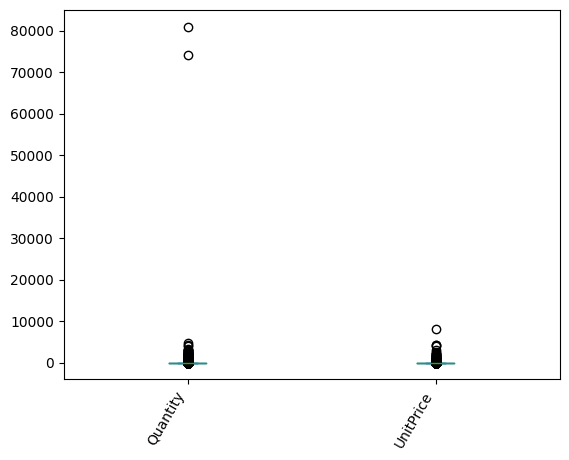

In [ ]:
# Box plot com dados padronizados
df[['Quantity', 'UnitPrice']].plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
for index, row in df1.iterrows():
    # Verificar se a quantidade é maior que 10000
    if row['Quantity'] > 10000 or row['UnitPrice']>5000:
        # Remover a linha do DataFrame
        df = df.drop(index)

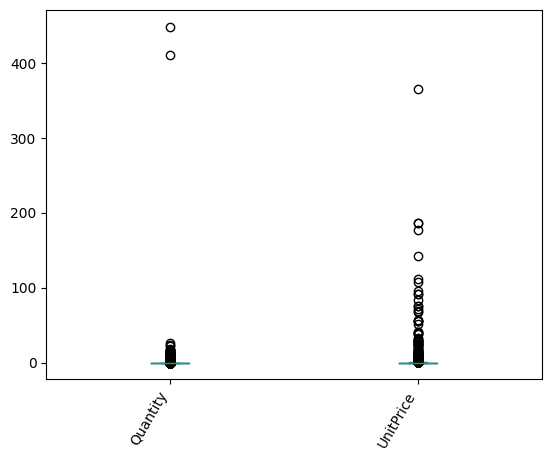

In [ ]:
df[['Quantity', 'UnitPrice']].apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date


In [ ]:
#Última Data
ultima_data_compra = df['InvoiceDate'].max()
print(ultima_data_compra)

2011-12-09


### Gráficos


In [ ]:
import plotly.express as px
# Top 10 países com maior valor em vendas
top_paises = df.groupby('Country')['TotalPrice'].sum().nlargest(10).reset_index()
fig = px.bar(top_paises, x='Country', y='TotalPrice', title='Top 10 Países com Maior Valor em Vendas')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(xaxis_title='País', yaxis_title='Valor de Vendas', width=600, height=400)
fig.show()


In [ ]:
#Top 10 produtos mais vendidos
top_produtos = df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
fig = px.bar(top_produtos, x='Description', y='Quantity', title='Top 10 Produtos Mais Vendidos')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(xaxis_title='Produto', yaxis_title='Quantidade Vendida', width=700, height=600)  # Ajuste de tamanho aqui
fig.show()

In [ ]:
#Valor de venda por mês
import calendar
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month  # Extraindo o mês da coluna 'Data'
df['MonthName'] = df['Month'].apply(lambda x: calendar.month_name[x])
venda_por_mes = df.groupby('MonthName')['TotalPrice'].sum().reset_index()
venda_por_mes = venda_por_mes.sort_values(by='TotalPrice', ascending=False)
fig = px.bar(venda_por_mes, x='MonthName', y='TotalPrice', title='Valor de Venda Total por Mês')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(xaxis_title='Mês', yaxis_title='Valor de Vendas', width=800, height=600)
fig.show()

In [ ]:
# Valor de venda total por mês e por país (considerando apenas os top 10 países)
top_paises = df.groupby('Country')['TotalPrice'].sum().nlargest(10).reset_index()['Country'].tolist()
venda_por_mes_pais = df[df['Country'].isin(top_paises)].groupby(['MonthName', 'Country'])['TotalPrice'].sum().reset_index()
# Ordenando os meses de acordo com o valor de vendas total para cada país
venda_por_mes_pais = venda_por_mes_pais.sort_values(by=['Country', 'TotalPrice'], ascending=[True, False])
fig = px.bar(venda_por_mes_pais, x='MonthName', y='TotalPrice', color='Country', title='Valor de Venda Total por Mês e País (Top 10)')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(xaxis_title='Mês', yaxis_title='Valor de Vendas', width=800, height=600)
fig.show()

In [ ]:
df2 = df.copy()
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,12,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,December


In [ ]:
df2.groupby('CustomerID')['InvoiceNo']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,12,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,December


In [ ]:
df3 = df[['CustomerID','InvoiceDate','TotalPrice']]
df3.groupby('CustomerID')
df3

,CustomerID,InvoiceDate,TotalPrice
0,17850,2010-12-01,15.30
1,17850,2010-12-01,20.34
2,17850,2010-12-01,22.00
3,17850,2010-12-01,20.34
4,17850,2010-12-01,20.34
...,...,...,...
541904,12680,2011-12-09,10.20
541905,12680,2011-12-09,12.60
541906,12680,2011-12-09,16.60
541907,12680,2011-12-09,16.60


In [ ]:
#RFM

# Calculando a recência para cada cliente

ultima_data_compra = pd.to_datetime(ultima_data_compra)
recencia = ultima_data_compra - df.groupby('CustomerID')['InvoiceDate'].max()
recencia = recencia.dt.days  # Convertendo a diferença em dias

# Calculando a frequência para cada cliente
frequencia = df.groupby('CustomerID')['InvoiceNo'].nunique()
# Calculando o valor monetário para cada cliente
ticketMedio = df.groupby('CustomerID')['TotalPrice'].mean().round(2)

# Agrupando as métricas RFM para cada cliente
df_rfm = pd.DataFrame({'Recência': recencia, 'Frequência': frequencia, 'Ticket Médio': ticketMedio})

# Exibindo o resultado
df_rfm

,Recência,Frequência,Ticket Médio
CustomerID,,,
12346,325,1,77183.60
12347,2,7,23.68
12348,75,4,57.98
12349,18,1,24.08
12350,310,1,19.67
...,...,...,...
18280,277,1,18.06
18281,180,1,11.55
18282,7,2,14.84


In [ ]:
df_rfm.to_csv('rfm.csv', index=True)

In [ ]:
from google.colab import files
files.download('rfm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>